In [6]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
df_id = df[df.job_country == "Indonesia"].copy()
df_id['job_posted_month'] = df_id['job_posted_date'].dt.strftime('%B') # extract month name
df_id_pivot = df_id.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size') # create pivot table
df_id_pivot.reset_index(inplace=True) # reset index to make job_posted_month a column again
df_id_pivot['month_number'] = pd.to_datetime(df_id_pivot['job_posted_month'], format='%B').dt.month # create month_number column for sorting
df_id_pivot.sort_values('month_number', inplace=True) # sort by month_number
df_id_pivot.set_index('job_posted_month', inplace=True) # set job_posted_month as index
df_id_pivot.drop(columns='month_number', inplace=True) # drop month_number column after sorting

In [42]:
df_US = df[df.job_country == "United States"].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B') # extract month name
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size') # create pivot table
df_US_pivot.reset_index(inplace=True) # reset index to make job_posted_month a column again
df_US_pivot['month_number'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month # create month_number column for sorting
df_US_pivot.sort_values('month_number', inplace=True) # sort by month_number
df_US_pivot.set_index('job_posted_month', inplace=True) # set job_posted_month as index
df_US_pivot.drop(columns='month_number', inplace=True) # drop month_number column after sorting

In [43]:
# df_id_pivot
df_US_pivot
# df[df.job_country == "United States"]

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [1]:
import pandas as pd

In [3]:
listJobs = [
  {
  'job_id': 1,
  'job_title' : 'Data Scientist',
  'company_name' : 'Google',
  'job_location' : 'Indonesia, Jakarta',
},{
  'job_id': 2,
  'job_title' : 'Software Engineer',
  'company_name' : 'Microsoft',
  'job_location' : 'Indonesia, Jogyakarta',
}, {
  'job_id': 3,
  'job_title' : 'Product Manager',
  'company_name' : 'Amazon',
  'job_location' : 'Indonesia, Bali',
}, {
  'job_id': 4,
  'job_title' : 'Marketing Director',
  'company_name' : 'Facebook',
  'job_location' : 'Indonesia, Jakarta',
}, {
  'job_id': 5,
  'job_title' : 'HR Manager',
  'company_name' : 'Apple',
  'job_location' : 'Indonesia, Bandung',
}
]

df_jobs = pd.DataFrame(listJobs)
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Indonesia, Jakarta"
1,2,Software Engineer,Microsoft,"Indonesia, Jogyakarta"
2,3,Product Manager,Amazon,"Indonesia, Bali"
3,4,Marketing Director,Facebook,"Indonesia, Jakarta"
4,5,HR Manager,Apple,"Indonesia, Bandung"


In [4]:
companies = [
  {
    'company_name': 'Google',
    'industry': 'Technology',
    'size': '10000+'
  }, {
    'company_name': 'Microsoft',
    'industry': 'Technology',
    'size': '10000+'
  }, {
    'company_name': 'Amazon',
    'industry': 'E-commerce',
    'size': '10000+'
  }, {
    'company_name': 'Facebook',
    'industry': 'Social Media',
    'size': '10000+'
  }, {
    'company_name': 'Apple',
    'industry': 'Technology',
    'size': '10000+'
  }
]

df_companies = pd.DataFrame(companies)
df_companies

,company_name,industry,size
0,Google,Technology,10000+
1,Microsoft,Technology,10000+
2,Amazon,E-commerce,10000+
3,Facebook,Social Media,10000+
4,Apple,Technology,10000+


In [5]:
# df_jobs_companies = pd.merge(df_jobs, df_companies, on='company_name', how='left')
# df_jobs_companies
df_jobs.merge(df_companies, on='company_name')

,job_id,job_title,company_name,job_location,industry,size
0,1,Data Scientist,Google,"Indonesia, Jakarta",Technology,10000+
1,2,Software Engineer,Microsoft,"Indonesia, Jogyakarta",Technology,10000+
2,3,Product Manager,Amazon,"Indonesia, Bali",E-commerce,10000+
3,4,Marketing Director,Facebook,"Indonesia, Jakarta",Social Media,10000+
4,5,HR Manager,Apple,"Indonesia, Bandung",Technology,10000+


In [11]:
df_id_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,14,9,35,117,80,8,5,10,19,14
February,9,2,25,78,44,5,4,12,5,18
March,6,5,21,90,36,2,1,13,5,14
April,5,3,20,46,28,2,1,9,8,14
May,11,9,25,79,39,3,2,8,9,4
June,11,4,22,66,32,4,1,8,9,8
July,11,3,25,58,46,9,4,8,3,20
August,12,5,32,78,46,1,3,5,5,15
September,4,7,34,83,50,6,5,10,8,9


In [14]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

In [46]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')

In [52]:
# top_5 = df_US_merged.sum().sort_values(ascending=False).head().index.tolist()
top_5 = (
  df_US_merged # take the merged dataframe
  .sum() # sum each column
  .sort_values(ascending=False) # sort the sums in descending order
  .head() # take the top 5
  .index # get the index (column names)
  .tolist() # convert to list
)

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

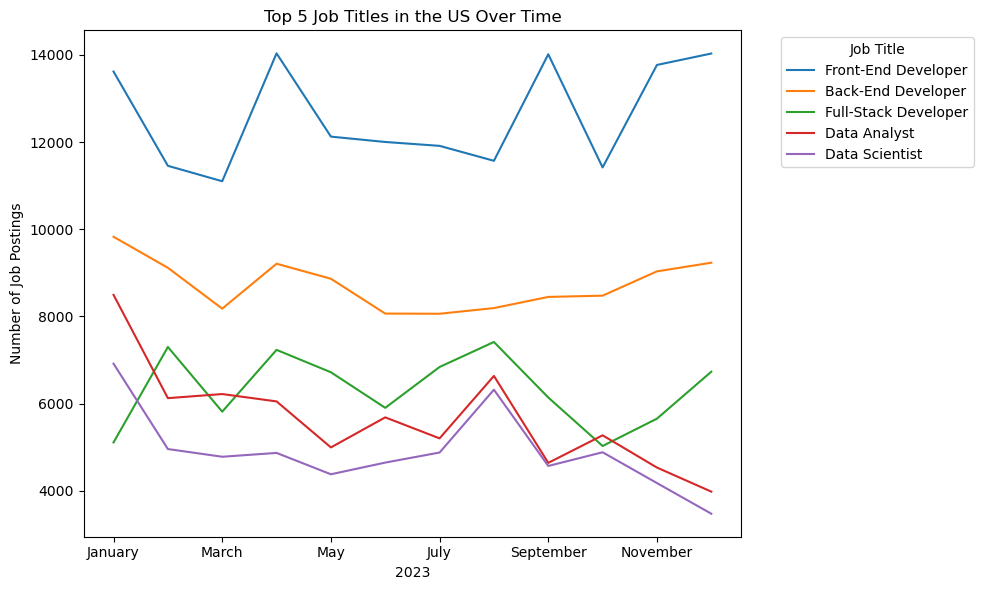

In [58]:
df_US_merged[top_5].plot(kind='line', figsize=(10, 6))
plt.title('Top 5 Job Titles in the US Over Time')
plt.xlabel('2023')
plt.ylabel('Number of Job Postings')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()